In [1]:
import geopandas as gpd
from shapely import LineString, Polygon, Point
import shapely
from shapely import ops
import matplotlib.pyplot as plt
from CPP_Planner import CPP_Algorithms, CPP_Planner_Kit, CPP_Algorithm_Optimizers
from shapely import affinity
from skimage.measure import approximate_polygon
import warnings
import math

In [2]:
all_road = gpd.read_file('test_Load_Shp/shp_file/村地和道路/村地道路.shp')
# all_land = gpd.read_file('test_Load_Shp/shp_file/村1地_全区.shp')
all_land = gpd.read_file('test_Load_Shp/shp_file/村地和道路/村地地块区域.shp')
all_road

,NAME,LAYER,长度,方位,曲折度,geometry
0,road_1,Unclassified Line Feature,888.63 m,"79° 42' 31.124""",1.666192,"LINESTRING (439970.642 4397162.081, 440018.014..."
1,road2,Unclassified Line Feature,357.14 m,"31° 42' 12.422""",1.192203,"LINESTRING (440434.446 4397388.117, 440449.094..."
2,road3,Unclassified Line Feature,419.07 m,"342° 37' 09.459""",2.027398,"LINESTRING (440336.764 4397536.936, 440332.829..."
3,road4,Unclassified Line Feature,201.21 m,"287° 47' 55.254""",1.099959,"LINESTRING (440255.474 4397478.095, 440239.314..."
4,road5,Unclassified Line Feature,148 m,"351° 45' 31.357""",1.054897,"LINESTRING (440455.670 4397656.556, 440457.652..."
5,road6,Unclassified Line Feature,575.97 m,"127° 59' 54.023""",2.950946,"LINESTRING (440597.385 4397653.052, 440641.958..."


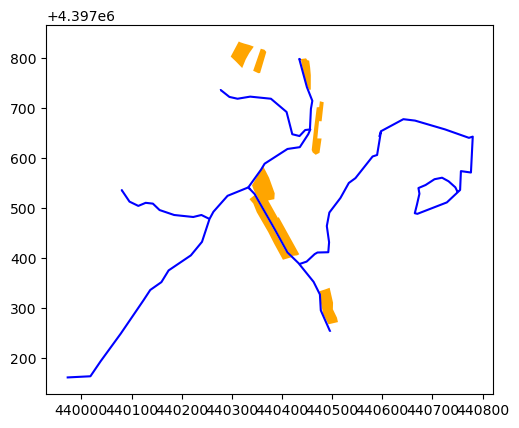

In [3]:
_, ax = plt.subplots()
all_road.plot(ax=ax, color='b')
all_land.plot(ax=ax, color='orange')
ax.set_aspect('equal')

/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


<Axes: >

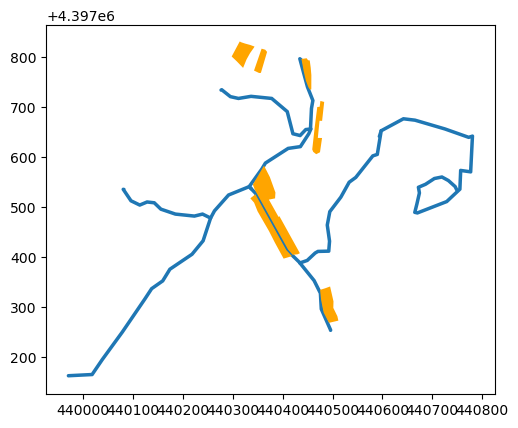

In [4]:
# 添加缓冲区
all_road_buffer = all_road.buffer(3.5)
_, ax = plt.subplots()
all_road_buffer.plot(ax=ax)
all_land.plot(ax=ax, color='orange')

In [5]:
# 仅保留与地块相交的道路
road_contact = []
for road in all_road_buffer.geometry:
    for land in all_land.geometry:
        if road.intersects(land):
            road_contact.append(road)
road_contact

/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


[<POLYGON ((440016.098 4397167.887, 440035.508 4397196.43, 440035.573 4397196...>,
 <POLYGON ((440016.098 4397167.887, 440035.508 4397196.43, 440035.573 4397196...>,
 <POLYGON ((440016.098 4397167.887, 440035.508 4397196.43, 440035.573 4397196...>,
 <POLYGON ((440277.228 4397731.169, 440277.162 4397731.154, 440276.821 439773...>,
 <POLYGON ((440439.131 4397793.054, 440445.395 4397769.746, 440452.982 439774...>]

<Axes: >

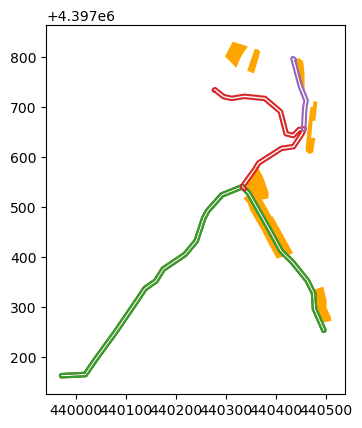

In [6]:
# 显示
_, ax = plt.subplots()
for road in road_contact:
    ax.plot(*road.exterior.xy)
all_land.plot(ax=ax, color='orange')

<Axes: >

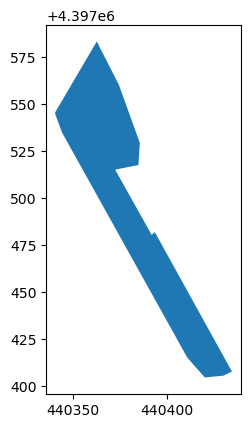